<h1> Machine Operations </h1>

In a factory, operating efficiency is key in order to maintain production. If a machine unexpectedly breaks down and the factory isn't prepared to handle the disuption, it can lead to production downtimes lasting from hours to days. Downtime like this severely reduces the factory's production output and might lead to major disruptions in the supply chain. Thus, it will be severely beneficial to be able to predict when a machine is going to fail as it allows for preemptive maintenance or allows a plan to be formed to minimise the disruption.
<br>
<hr>
<br>
Manufacturing machines are constantly under high intensity environments as they are working nonstop, constantly in motion and performing tasks, often bearing heavy loads or effort. Under these conditions, factors like excessive vibrations, extreme temperatures, excessive speeds and even the nature of the machine's work can all contribute to failure. Thus, by analysing the conditions that the machine works under, we can determine the strain it faces and its likelihood of failure.

# Import libraries and data

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [322]:
df = pd.read_csv("./data/factory_data (classification).csv")

display(df.info())
display(df.head())

'''
- dtypes are appropriate, there are some null values present
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


None

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [323]:
#Percent null
df.isnull().mean() * 100

'''
null values are in relatively small quantities
'''

Unique ID               0.000
Product ID              0.000
Quality                 4.955
Ambient T (C)           0.000
Process T (C)           2.000
Rotation Speed (rpm)    5.940
Torque (Nm)             0.000
Tool Wear (min)         0.000
Machine Status          0.000
dtype: float64

In [324]:
for col in df:
    uniques = df[col].unique()

    print(f"{col} number of unique values: {len(uniques)}")
    print(F"E.g.: {uniques[:9]}")
    print()

'''
- Unique ID, Product ID has large cardinality
'''

Unique ID number of unique values: 20000
E.g.: [1 2 3 4 5 6 7 8 9]

Product ID number of unique values: 19408
E.g.: ['K12965' 'Z62710' 'T20224' 'Z33024' 'Z52839' 'K53611' 'K40563' 'T39301'
 'S84663']

Quality number of unique values: 4
E.g.: ['M' 'L' nan 'H']

Ambient T (C) number of unique values: 94
E.g.: [24.95 25.05 25.15 25.35 25.25 25.45 25.55 25.65 25.75]

Process T (C) number of unique values: 84
E.g.: [35.45 35.55 35.35   nan 35.85 35.75 35.95 36.05 36.15]

Rotation Speed (rpm) number of unique values: 942
E.g.: [1551. 1408. 1498. 1433. 1425.   nan 1527. 1667. 1741.]

Torque (Nm) number of unique values: 577
E.g.: [42.8 46.3 49.4 39.5 40.  41.9 42.4 40.2 28.6]

Tool Wear (min) number of unique values: 246
E.g.: [ 0  3  5  7  9 11 14 16 18]

Machine Status number of unique values: 2
E.g.: [0 1]



'\n- Unique ID, Product ID has large cardinality\n'

# Graphical Distributions

## Data Distribution

'\n- Rotation Speed is positively skewed\n- Ambient and Process T are positively correlated\n- Torque and Rotation Speed are negatively correlated\n- Unique ID and Temps has a periodic relationship??\n'

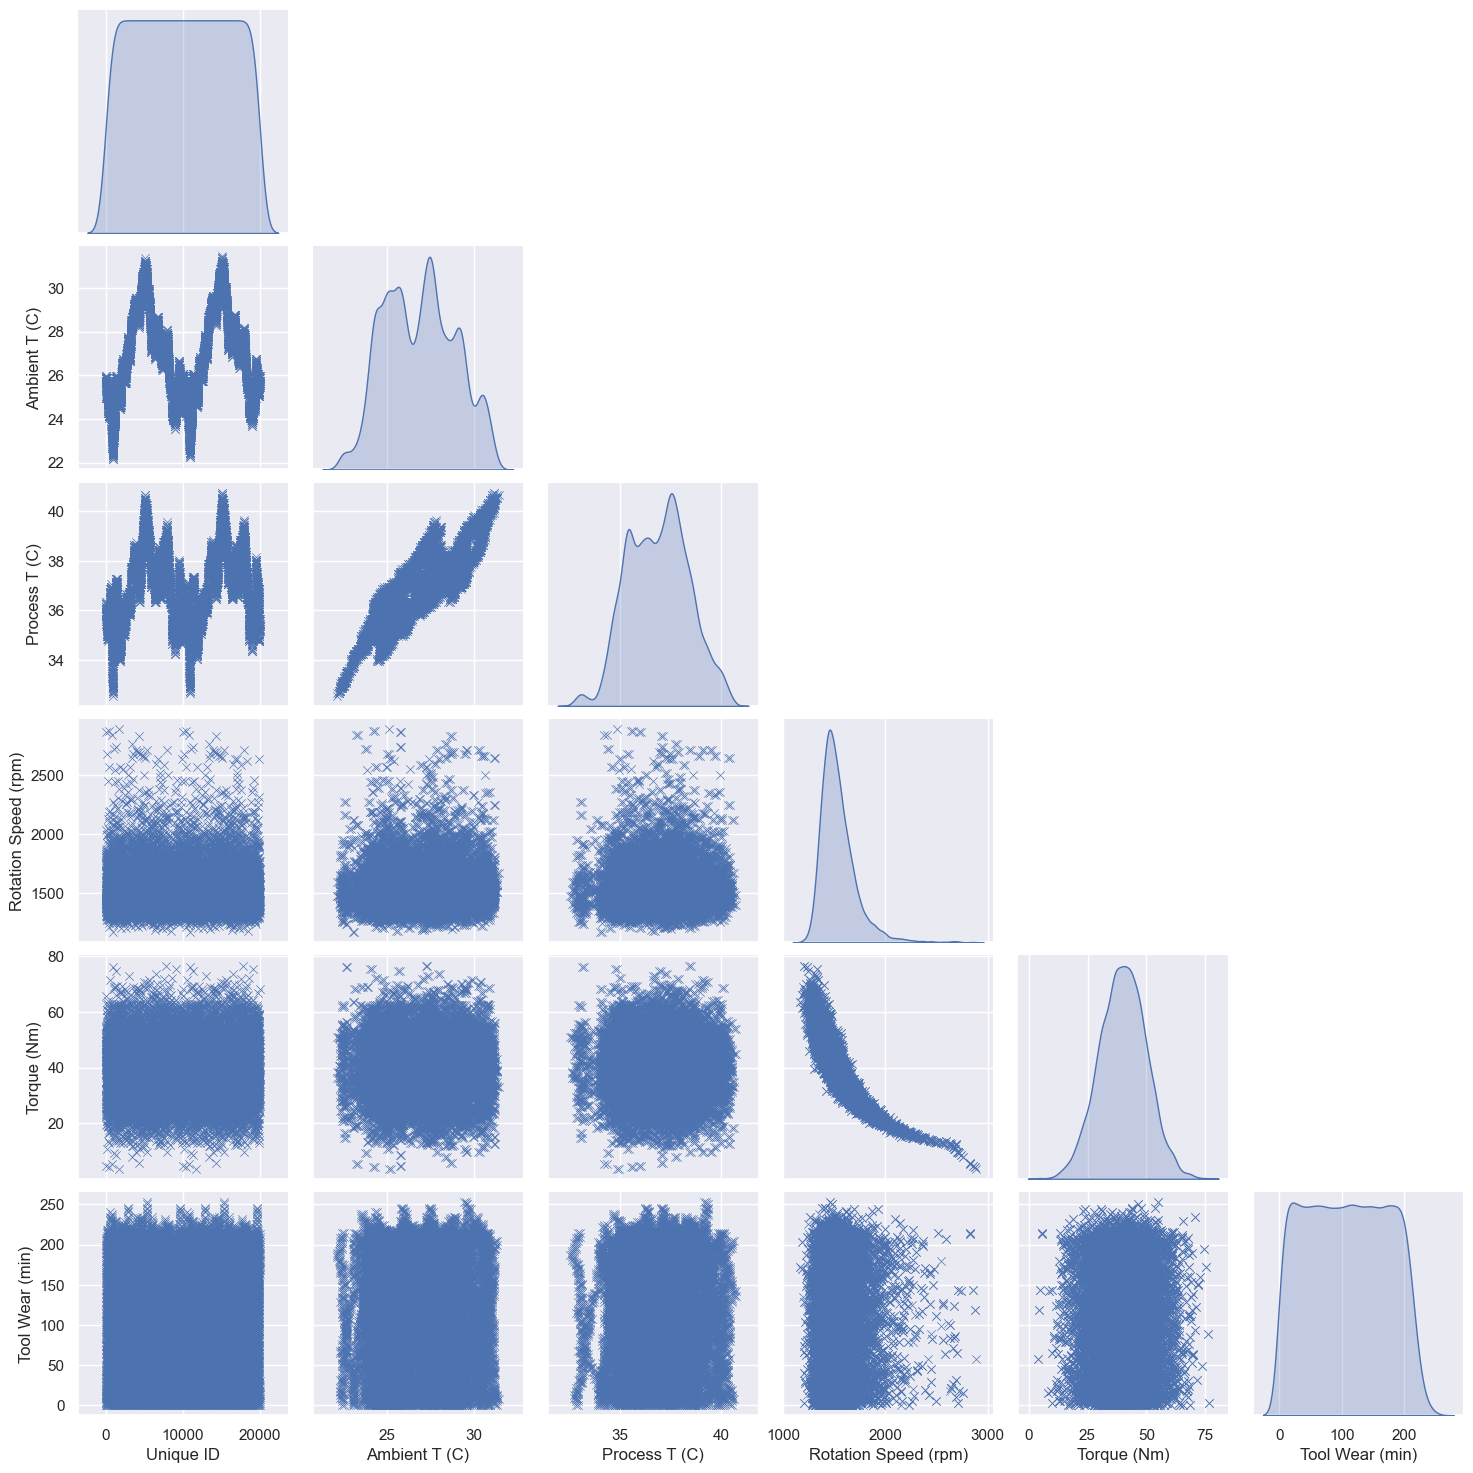

In [325]:
sns.pairplot(
    df.drop("Machine Status", axis=1, inplace=False),
    corner=True,
    markers="x",
    diag_kind="kde",
)

"""
- Rotation Speed is positively skewed
- Ambient and Process T are positively correlated
- Torque and Rotation Speed are negatively correlated
- Unique ID and Temps has a periodic relationship?? Perhaps ID 
 is sample by time, and temperature cycles with time
"""

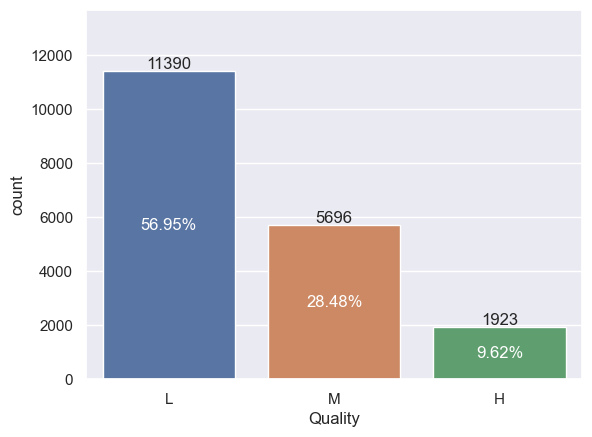

In [327]:
ax = sns.countplot(x="Quality", data=df, order=["L", "M", "H"])


# add annotations
for c in ax.containers:
    #values
    labels = [f"{v.get_height()}" for v in c]
    ax.bar_label(c, labels=labels, label_type="edge")

    #percents
    perc_labels = [f"{v.get_height()/len(df)*100:.2f}%" for v in c]
    ax.bar_label(
        c,
        labels=perc_labels,
        label_type="center",
        color="w",
        fontsize="medium",
    )

ax.margins(y=0.2)

plt.show()

## Distribution against Target

In [328]:
df_numeric = df.select_dtypes(include="number")

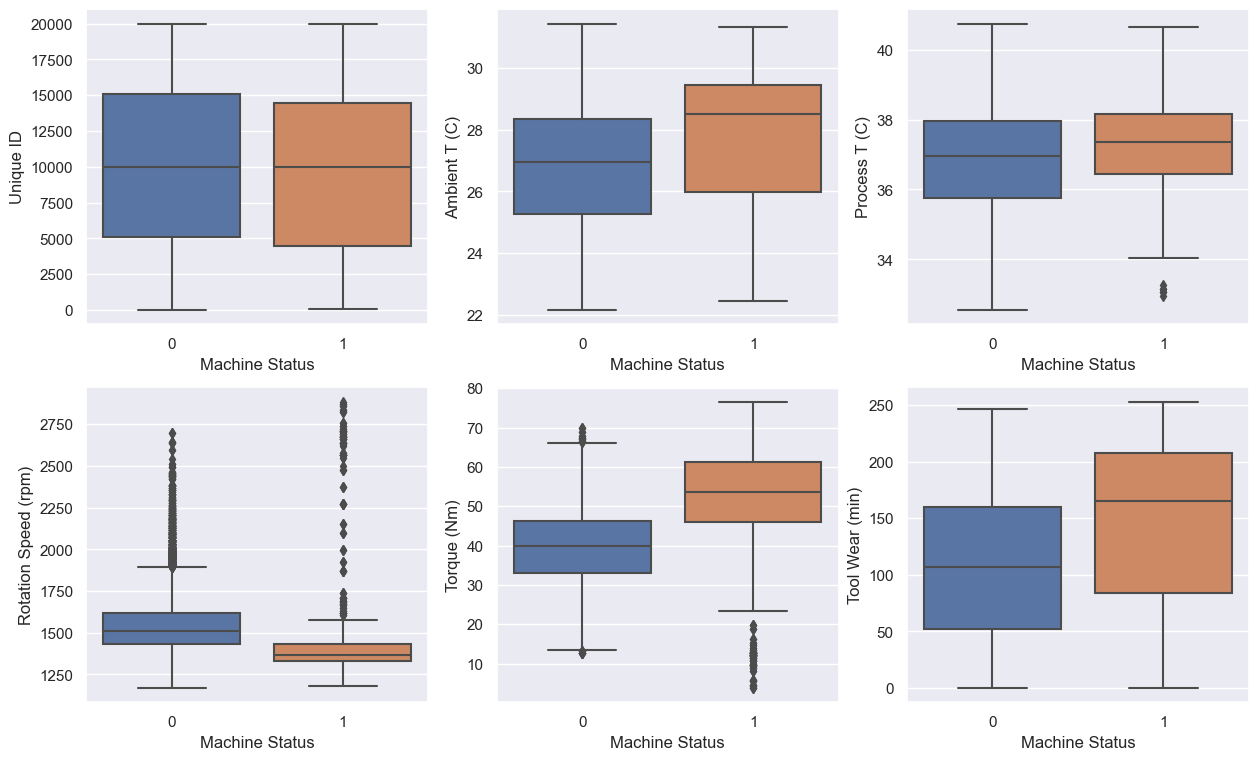

'\n- Distributions of Unique ID between Machine Status does not show much difference\n- Distributions of other features between Machine Status show more differences\n'

In [329]:
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for ax, col in zip(axs.flatten(), df_numeric):
    sns.boxplot(
        y=col,
        x="Machine Status",
        data=df_numeric,
        ax=ax,
    )

plt.show()

'''
- Distributions of Unique ID between Machine Status does not show much difference
- Distributions of other features between Machine Status show more differences
'''

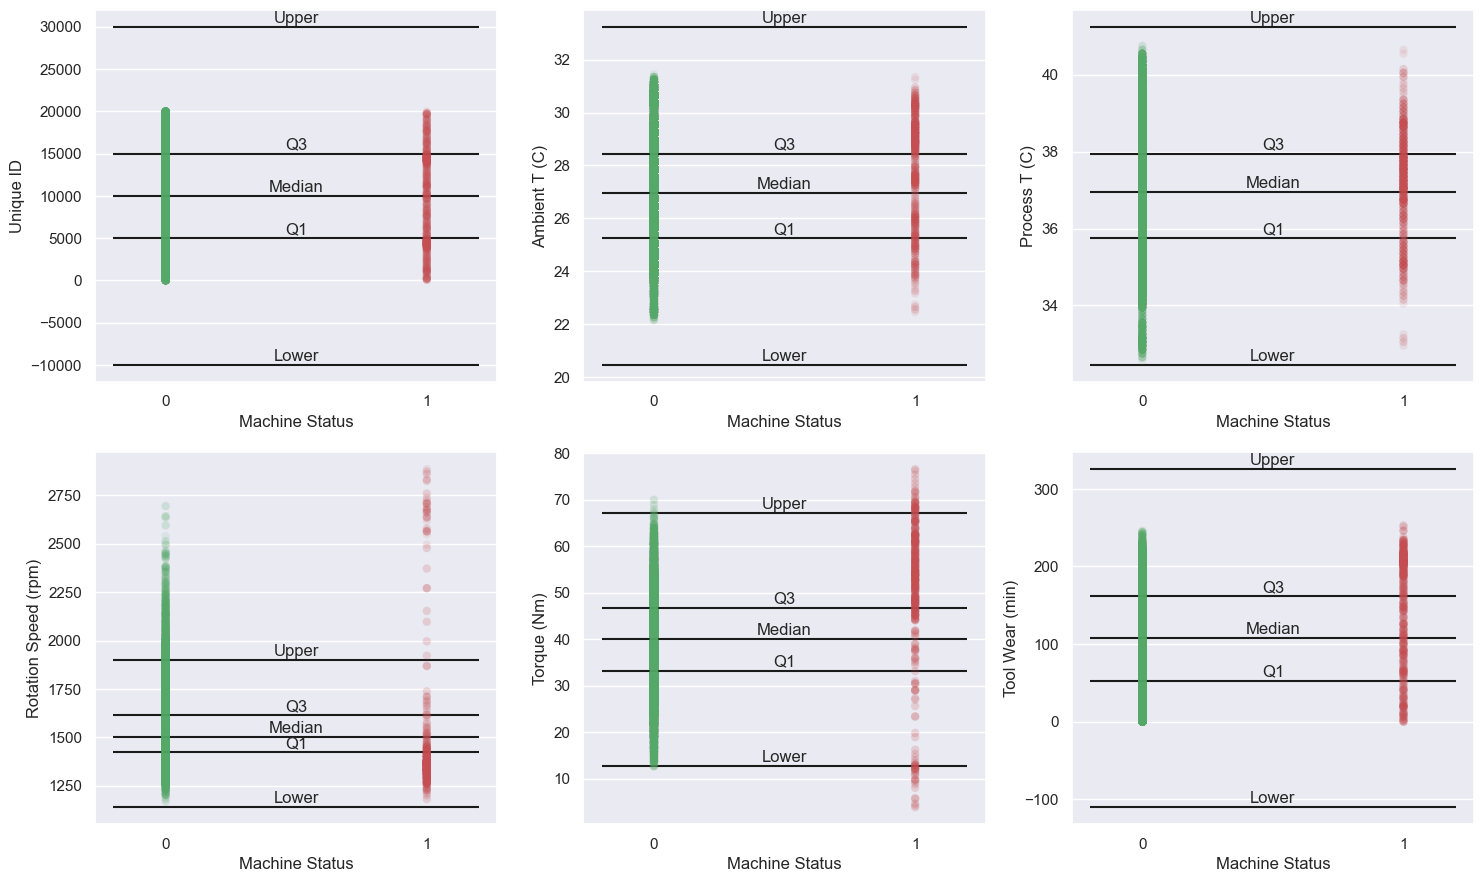

"\n- Outlier points are mostly the positive class, don't want to alter\n  them beacuse of class imbalance\n"

In [330]:
#plot uindividual data points by machine status along x axis
#lines correspond to the metrics calculated across the entire variable, not split by machine status

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for ax, col in zip(axs.flatten(), df_numeric):
    sns.stripplot(
        y=col,
        x="Machine Status",
        data=df_numeric,
        ax=ax,
        palette=["g", "r"],
        jitter=False,
        size=6,
        alpha=0.1,
    )

    IQR = df_numeric[col].quantile(0.75) - df_numeric[col].quantile(0.25)
    quantiles = [
        df_numeric[col].quantile(0.25) - 1.5 * IQR,
        df_numeric[col].quantile(0.25),
        df_numeric[col].quantile(0.5),
        df_numeric[col].quantile(0.75),
        df_numeric[col].quantile(0.75) + 1.5 * IQR,
    ]
    labels = ["Lower", "Q1", "Median", "Q3", "Upper"]

    ax.hlines(quantiles, -0.2, 1.2, colors="k")
    for q, l in zip(quantiles, labels):
        ax.annotate(l, (0.5, q), ha="center", xytext=(0, 3), textcoords="offset points")


plt.tight_layout()
plt.show()



'''
The lines on the plot show the numerical summary of the given variable
whille the points plotted are the actual data points, colored by
the data point's machine status

- Outlier points outside the fences
 are mostly the positive class, don't want to alter
  them beacuse of class imbalance
'''

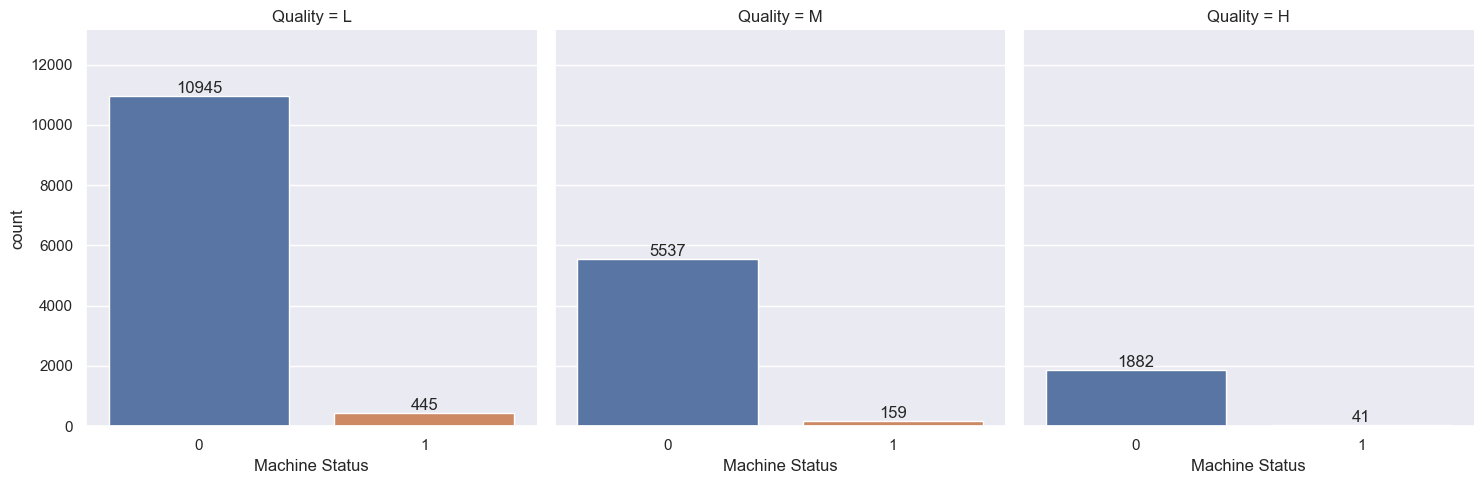

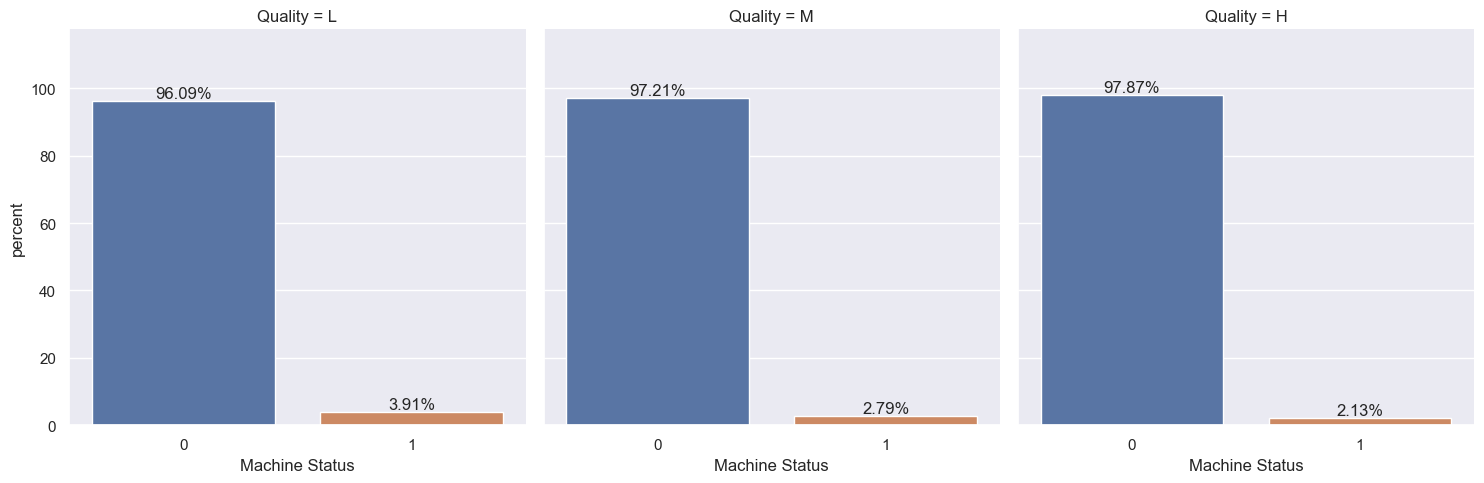

In [331]:
g = sns.catplot(
    x="Machine Status", col="Quality", kind="count", col_order=["L", "M", "H"], data=df
)

# iterate through axes
for ax in g.axes.flat:

    # add annotations
    for c in ax.containers:
        labels = [f"{v.get_height()}" for v in c]
        ax.bar_label(c, labels=labels, label_type="edge")

    ax.margins(y=0.2)

plt.tight_layout()
plt.show()


df_quality_count = df.groupby("Quality")["Machine Status"]
df_quality_count = df_quality_count.value_counts(normalize=True).mul(100)
df_quality_count = df_quality_count.rename("percent").reset_index()

g = sns.catplot(
    y="percent",
    x="Machine Status",
    col="Quality",
    col_order=["L", "M", "H"],
    data=df_quality_count,
    kind="bar",
)

# iterate through axes
for ax in g.axes.flat:

    # add annotations
    for c in ax.containers:
        labels = [f"{v.get_height():.2f}%" for v in c]
        ax.bar_label(c, labels=labels, label_type="edge")

    ax.margins(y=0.2)

plt.show()


'''
Percentage of failure rates decreases as quality increases from low to high,
makes some intuitive sense
'''

In [332]:
X = df.drop("Machine Status", inplace=False, axis=1)
y = df["Machine Status"]

In [333]:
y.value_counts()

0    19322
1      678
Name: Machine Status, dtype: int64

In [334]:
#Counts of target where row contains nan
df[df.isna().any(axis=1)]['Machine Status'].value_counts()

0    2386
1      85
Name: Machine Status, dtype: int64

# EDA Conclusions

<h3> Conclusions after EDA: </h3>
Missing Data:<br>
There are missing values in Quality, Process T and Rotation Speed. Quality and Rotation Speed have aroun 5-6% missing while Process T only has around 2% missing. Although these values are small, they contain a sizable portion of the positive class, which is already imbalanced. Hence, dropping them will be problematic and they will have to be imputed

Outliers:<br>
Although there are quite a few data points which lie outside the upper and lower fences for rotation speed and torque, these data points include quite a few of the positive class, which is already imbalanced. Hence, capping or dropping the outliers may be problematic and alter the distribution of the data.

Features: <br>
Unique ID and Product ID have high cardinalities, hence they either have to be reduced or dropped in order to reduce the dimensions of the dataset <br>
Ambient T and Process T, and Rotation Speed and Torque are highly correlated, but there are not a lot of features present in the dataset, therefore combining them may be detrimental for the machine learning models <br>
The distributions of Process and Ambient T, Rotation Speed, Torque and Tool Wear differ between Machine Status. Hence these features have some statistical significance to the feature <br>
Quality seems to have a slight correlation with Machine Status. As the Quality increases from Low to High, the percentage of machine failures decreases, which makes some intuitive sense. <br>




<h3>Classification Task: </h3>

<h4>Given collected data about any machine, classify correctly whether its Machine Status is 0 or 1, as in predicting whether it is operational or not.<h4>

# Feature Engineering

## Feature Creation

Looking at the available data, we can calculate some additional features. <br>
1. We can calculate the difference in internal and external temperature of the machine by subtracting Process T from Ambient T. This might be useful in predicting machine failure as a steep temperature gradient may cause a machine's components to contract and expand rapidly, possibly causing damage.
<br>
<br>
2. We can calculte the Power output of the machine via the formula Power(kW) = (Torque(Nm) * RPM) / 9549. This metric might be intepreted as how hard a machine is working via its energy output per time, and machines that work harder might fail more often.
<br>

3. We can cclculate the total number of revolutions a machine will make before it's tool wears by
multiplying its rotatinos speed in rpm by its tool wear time in mins. This might give us a metric to measure
the physical wear a machine sustains

In [403]:
df['Temp Diff (C)'] = df['Process T (C)'] - df['Ambient T (C)']
df['Power (kW)'] = (df['Torque (Nm)']*df['Rotation Speed (rpm)']) /9549
df['Revolutions'] = df['Tool Wear (min)']*df['Rotation Speed (rpm)']

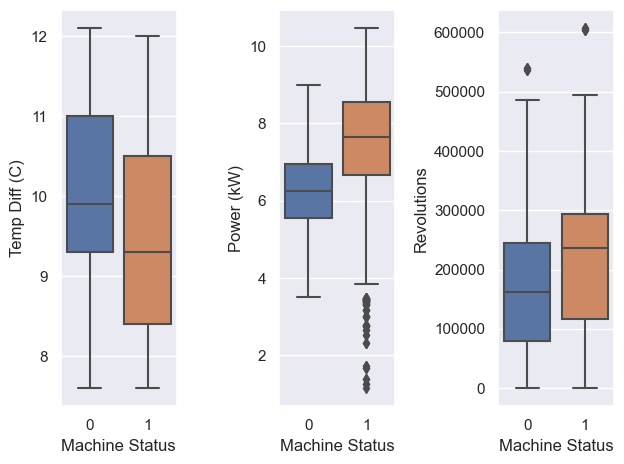

'\nDistribution shows some difference for both variables between Machine Status\n'

In [405]:
fig, axs = plt.subplots(1, 3)
cols = ['Temp Diff (C)', 'Power (kW)', 'Revolutions']
for ax, col in zip(axs, cols):
    sns.boxplot(
        y=col,
        x="Machine Status",
        data=df,
        ax=ax,
    )

plt.tight_layout()
plt.show()

'''
Distribution shows some difference for both variables between Machine Status
'''

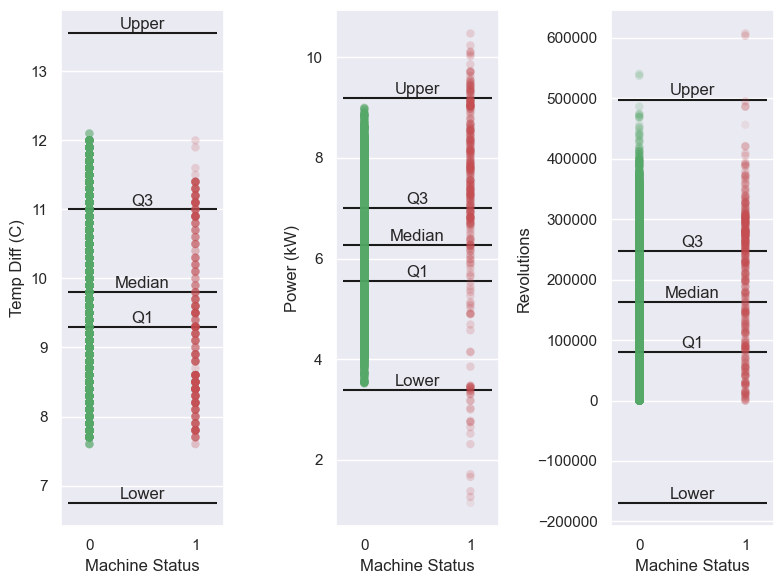

'\nOutliers tend to  be the positive class for power, while there doesn;t seem to be \noutliers for temp diff(C)\n'

In [406]:
#plot uindividual data points by machine status along x axis
#lines correspond to the metrics calculated across the entire variable, not split by machine status

fig, axs = plt.subplots(1, 3, figsize=(8, 6))
for ax, col in zip(axs.flatten(), cols):
    sns.stripplot(
        y=col,
        x="Machine Status",
        data=df,
        ax=ax,
        palette=["g", "r"],
        jitter=False,
        size=6,
        alpha=0.1,
    )

    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    quantiles = [
        df[col].quantile(0.25) - 1.5 * IQR,
        df[col].quantile(0.25),
        df[col].quantile(0.5),
        df[col].quantile(0.75),
        df[col].quantile(0.75) + 1.5 * IQR,
    ]
    labels = ["Lower", "Q1", "Median", "Q3", "Upper"]

    ax.hlines(quantiles, -0.2, 1.2, colors="k")
    for q, l in zip(quantiles, labels):
        ax.annotate(l, (0.5, q), ha="center", xytext=(0, 3), textcoords="offset points")


plt.tight_layout()
plt.show()

'''
Outliers tend to  be the positive class for power, while there doesn't seem to be 
outliers for temp diff(C)
'''

Looking at the plots, there seems to be some statistical signifiance of the created features to Machine Status. In addition, the outliers for Power and Revolutions once again belong to the positive class, hence capping or dropping them will be problematic

## Feature Extraction

Product ID has a high cardinality, as found out in the EDA process, but every product ID is prefixed by a letter. Hence, we might be able to extract the first letter in order to reduce the number of dimensions

In [338]:
df['Product Category'] = df['Product ID'].str.get(0)

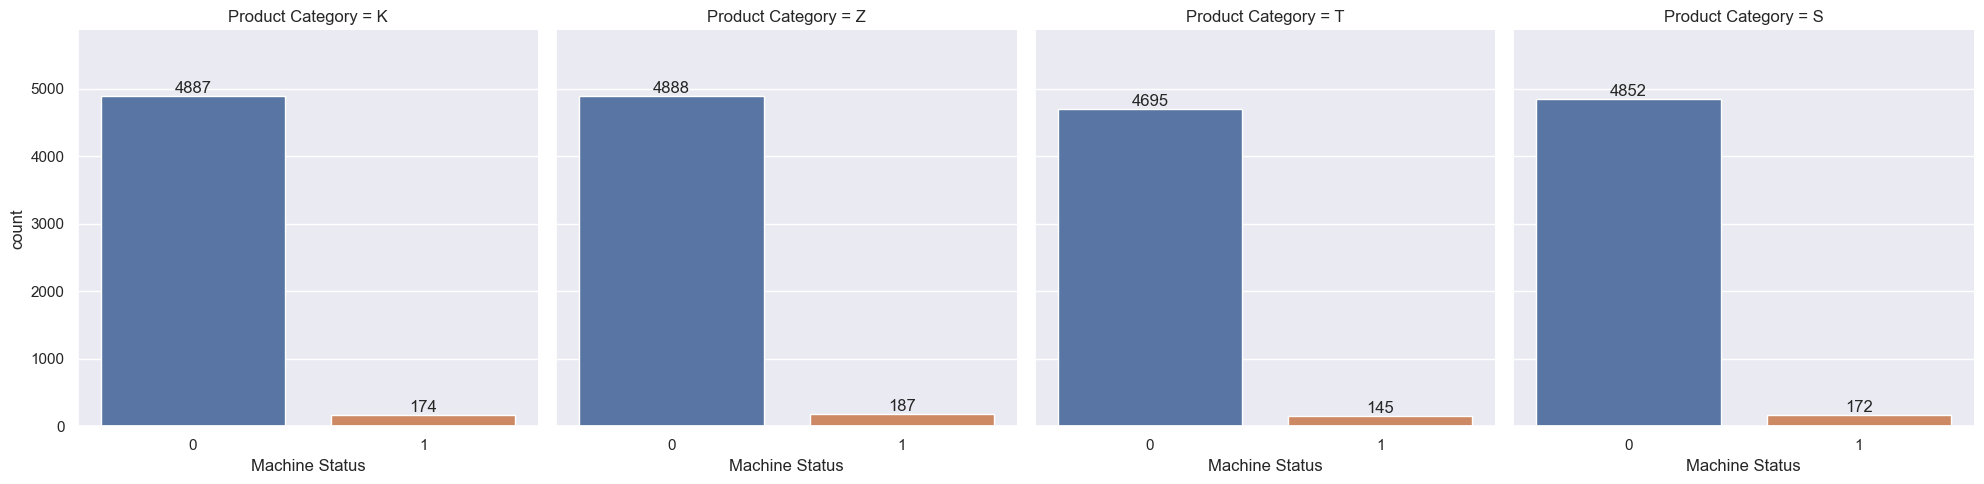

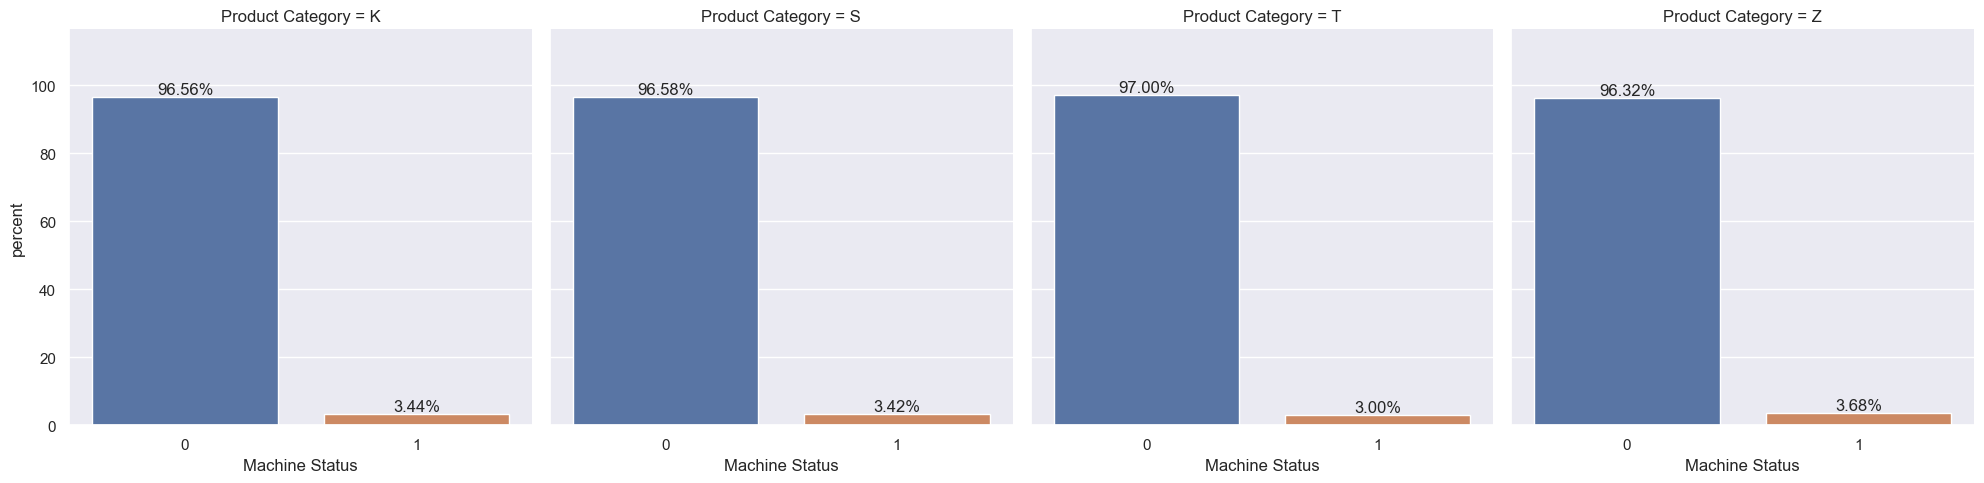

In [339]:
g = sns.catplot(
    x="Machine Status", col="Product Category", kind="count", data=df
)

# iterate through axes
for ax in g.axes.flat:

    # add annotations
    for c in ax.containers:
        labels = [f"{v.get_height()}" for v in c]
        ax.bar_label(c, labels=labels, label_type="edge")

    ax.margins(y=0.2)

plt.tight_layout()
plt.show()


df_prod_count = df.groupby("Product Category")["Machine Status"]
df_prod_count = df_prod_count.value_counts(normalize=True).mul(100)
df_prod_count = df_prod_count.rename("percent").reset_index()

g = sns.catplot(
    y="percent",
    x="Machine Status",
    col="Product Category",
    data=df_prod_count,
    kind="bar",
)

# iterate through axes
for ax in g.axes.flat:

    # add annotations
    for c in ax.containers:
        labels = [f"{v.get_height():.2f}%" for v in c]
        ax.bar_label(c, labels=labels, label_type="edge")

    ax.margins(y=0.2)

plt.show()

The distribution of the target variable among the different product categories is extremely similar, hence there might not be a very strong relationship

## Feature Selection

Unique ID has a high cardinality and very little correlation to the target variable, thus it can be dropped without losing too much information <br>

In [340]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import crosstab

In [341]:
[row_vars, col_vars], counts = crosstab(
    df["Machine Status"], df["Product Category"]
)
contingency_table = pd.DataFrame(data=counts, index=row_vars, columns=col_vars)
chi2, p, dof, expected = chi2_contingency(contingency_table.values)

display(contingency_table)
print()
print(f"Chi^2: {chi2}")
print(f"P-value: {p:.10f}")

,K,S,T,Z
0,4887,4852,4695,4888
1,174,172,145,187



Chi^2: 3.694677265340725
P-value: 0.2963769016


The Product Category extracted has a similar distributions among the target variable, and a chi-square test for homogeneity produced a p-value of 0.296, hence it might not contain a lot of information. <br>

# Modelling

In [342]:
#reset df after eda

df = pd.read_csv("./data/factory_data (classification).csv")
X = df.drop("Machine Status", inplace=False, axis=1)
y = df["Machine Status"]

## sklearn libraries

In [343]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_union

from sklearn.pipeline import make_pipeline

## Custom Transformers

In [344]:
from sklearn.base import BaseEstimator, TransformerMixin

#dummytransformer which acts as a base to inherit fit and transform methods
class DummyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None, y=None):
        return self

In [345]:
##Wrapper for pipeline transformers to output a dataframe
# from the transformer's numpy array output and get_feature_names_out method
# used to ensure dataframes get passed between pipelines steps to allow for column slicing
class DF_Transformer(DummyTransformer):
    def __init__(self, ct):
        self.ct = ct
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        self.ct = self.ct.fit(X)

        names = self.ct.get_feature_names_out()
        cleaned_names = pd.Series(names).str.replace(r"(\w*[__])", "", regex=True)
        self.feature_names_in_ = cleaned_names

        return self

    def transform(self, X, y=None):
        # display(X.head())
        # print(self.feature_names_in_)
        data = self.ct.transform(X)

        # display(data[:5])

        cols = self.feature_names_in_
        return pd.DataFrame(
            data=data,
            columns=cols.values,
        ).convert_dtypes() #convert dtypes automatically makes appropriate dtypes

    def get_feature_names_out(self, input_features=None):
        return self.feature_names_in_


from functools import reduce

# Custom transformer to perform arithmethic operations on a set of columns in the data
class createFeature(DummyTransformer):
    def __init__(self, cols, operations, name):
        self.cols = cols
        self.operations = operations
        self.name = name
        self.created = None

    def transform(self, X, y=None):
        self.created = []

        output = None

        if isinstance(self.operations, str):
            if self.operations == "add":
                output = reduce(lambda col1, col2: X[col1].add(X[col2]), self.cols)

            if self.operations == "subtract":
                output = reduce(lambda col1, col2: X[col1].sub(X[col2]), self.cols)

            if self.operations == "multiply":
                output = reduce(lambda col1, col2: X[col1].mul(X[col2]), self.cols)

            if self.operations == "divide":
                output = reduce(lambda col1, col2: X[col1].div(X[col2]), self.cols)

        else:
            output = X[self.cols[0]].copy()
            for i, op in enumerate(self.operations):
                if op == "add":
                    output += X[self.cols[i + 1]]

                if op == "subtract":
                    output -= X[self.cols[i + 1]]

                if op == "multiply":
                    output *= X[self.cols[i + 1]]

                if op == "divide":
                    output /= X[self.cols[i + 1]]

        self.created= output #output is pd sereis
        return pd.DataFrame(self.created).values #.values to convert to np array, pd.DataFrame to ensure right dimensions

    def get_feature_names_out(self, input_features=None):
        # print(f'create :{self.names}')
        return np.array([self.name])


# Custom transformer to extract first character of a column
# Used in product category, converted into transformer so that it can be used in pipeline
class extractFirstCharacter(DummyTransformer):
    def __init__(self, col, name):
        self.col = col
        self.name = name
        self.created = None

    def transform(self, X, y=None):
        self.created = X[self.col].str.get(0)

        return pd.DataFrame(self.created).values #.values to convert to np array, pd.DataFrame to ensure right dimensions


    def get_feature_names_out(self, input_features=None):
        # print(f'extract :{self.name}')
        return np.array([self.name])


# Custom transformer to select only specified columns
class selectFeature(DummyTransformer):
    def __init__(self, slice):
        self.slice = slice

    def transform(self, X):
        return X[self.slice].values #.values to convert to np array

    def get_feature_names_out(self, input_features=None):
        # print(f'slice :{self.slice}')
        return np.array(self.slice)


## Compose Transformers

In [346]:
## Imputers ##
simpImp_ct = make_column_transformer(
    (SimpleImputer(strategy="mean"), make_column_selector(dtype_include="number")),
    (
        SimpleImputer(strategy="most_frequent"),
        make_column_selector(dtype_include="object"),
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
)


## Feature Transformations ##
mask = ~X.columns.isin(["Product ID", "Unique ID"])
featTrans_fu = make_union(
    createFeature(["Process T (C)", "Ambient T (C)"], "subtract", "Temp Diff (C)"),
    createFeature(["Rotation Speed (rpm)", "Torque (Nm)"], "multiply", "Power (kW)"),
    createFeature(["Rotation Speed (rpm)", "Tool Wear (min)"], "multiply", "Revolutions"),
    extractFirstCharacter("Product ID", 'Product Category'),
    selectFeature(X.columns[mask]),
)


## Scalers ##
stdScale_ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include="number")),
    remainder="passthrough",
    verbose_feature_names_out=False,
)


# Encoders ##
encode_ct = make_column_transformer(
    (OrdinalEncoder(categories=[["L", "M", "H"]]), ["Quality"]),
    (OneHotEncoder(drop="first"), ["Product Category"]),
    remainder="passthrough",
    verbose_feature_names_out=False,
)


## Compose Pipeline

In [347]:
preprocessor_pipe = make_pipeline(
    DF_Transformer(simpImp_ct),
    DF_Transformer(featTrans_fu),
    DF_Transformer(stdScale_ct),
    DF_Transformer(encode_ct),
)


'''
Processing steps applied:
Impute with mean for numerical and mode for categorical
Construct additional features and drop unnecessary
Standardise all numerical data
Onehot encode Product Category, ordinal encode quality
''

## Model Selection

In [349]:
from sklearn.model_selection import train_test_split

#default 0.7 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39, stratify=y)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (15000, 8)
y_train: (15000,)
X_test: (5000, 8)
y_test: (5000,)


In [350]:
# Import appropriate classification models

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Plot Learning Curves for models

In [351]:
from sklearn.base import clone

from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [352]:
fb_kwargs = {"beta": 2.0}

#f2-score
#==================================================================================================================================================================#
#f2 score as we don't want to fail to predict a machine's failure, but at the same time we don't want to predict and operational machine as failure as it wastes recources
#Hence, an f score was used
#f2-score was used as failing to predict a machine failure is very costly, possibly halting the production line, more costly than having someone to diagnose whether a machine 
#actually failed
#Hence, recall is given more weight than precision
#==================================================================================================================================================================#
fbeta_scorer = make_scorer(fbeta_score, **fb_kwargs)

<h2>Evaluation Metric </h2>

The metric for evaluation is the f2-score, which is the weighted harmonic mean of precision and recall, giving more weight to recall's value which means false negatives are penalised more heavily.
<br>
This metric was chosen becauese predictions of failure when the machine is operational, i.e. false positives, leads to wasted resources spent diagnosing the machine while predictions of operational while the machine fails, i.e. recall, is the very problem we want to solve. Hence an f-score is appropriate
<br>
However, recall is weighted more heavily as failures result in more dire consequences than wasted resources spent diagnosing the machine

In [353]:
#function for plotting learning curve for models
#modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes,
    ylim=None,
    cv=None,
    n_jobs=4,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    scoring_name=None,
):  

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    if scoring_name is None:
        scoring_name = scoring
    axes.set_xlabel("Training examples")
    axes.set_ylabel(scoring_name)

    train_sizes, train_scores, test_scores, _, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid(True)
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    # Annotate learning curve
    for x, y in zip(train_sizes, train_scores_mean):
        value = round(y, 3)
        axes.annotate(text=value, xy=(x, y + 0.05), color="r", ha="center")
    for x, y in zip(train_sizes, test_scores_mean):
        value = round(y, 3)
        axes.annotate(text=value, xy=(x, y - 0.05), color="g", ha="center")

In [354]:
#takes in dict of models and executes plot learning curve on them
def model_selection(models, pipelines, X_train, y_train, lc_kwargs, total_cols=3):

    for desc, pipe in pipelines.items():
        print(desc)

        num_plots = len(models)
        total_rows = num_plots // total_cols + 1

        if num_plots > 1:
            fig, axs = plt.subplots(
                nrows=total_rows,
                ncols=total_cols,
                figsize=(7 * total_cols, 4 * total_rows),
                constrained_layout=True,
            )
        else:
            fig, ax = plt.subplots(
                nrows=1,
                ncols=total_cols,
                constrained_layout=True,
                )
            axs = np.array([ax]).reshape(1,1)

        for i, (mdl_name, mdl) in enumerate(models.items()):
            pipe_clone = clone(pipe)
            pipe_clone.steps.append((mdl_name, mdl))

            row = i // total_cols
            col = i % total_cols

            print(f"Cross Validating {mdl_name}...", end="  ")
            plot_learning_curve(
                pipe_clone, mdl_name, X_train, y_train, axes=axs[row][col], **lc_kwargs
            )
            print(f"{mdl_name} done!")

        for ax in axs.flat[num_plots:]:
            ax.set_axis_off()

        plt.show()

In [355]:
#plots confusion matrix and calculates f2-score

def evaluate_model(estimator, X, y, metric, scorer, cf_kwargs=None):
    print(f'{metric}: {scorer(estimator, X, y)}')

    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_axes([1, 1, 1, 1])
    ConfusionMatrixDisplay.from_estimator(estimator, X, y, ax=ax, **cf_kwargs)
    plt.grid(False)
    plt.show()

In [356]:
#returns series ranking feature importance of model

def feature_importance(model):
    feat_imp = model.feature_importances_
    feat_imp_names = model.feature_names_in_

    return pd.Series(data=feat_imp, index=feat_imp_names, name='Feature Importance').sort_values(ascending=False)

In [357]:
##kwargs
models = {
    "Dummy": DummyClassifier(strategy="uniform", random_state=39),
    "DeciTree": DecisionTreeClassifier(random_state=39),
    "kNNWeighted": KNeighborsClassifier(weights="distance"),
    "LogReg": LogisticRegression(random_state=39),
    "SVC": SVC(random_state=39),
    "RForest": RandomForestClassifier(random_state=39),
}

lc_kwargs = {
    "ylim": (0, 1.1),
    "cv": StratifiedKFold(n_splits=10, shuffle=True, random_state=39),
    "n_jobs": 3,
    "scoring": fbeta_scorer,
    "scoring_name": 'f2-score'
}

cf_kwargs = {
    "cmap": "Greens",
    "normalize": None,
    "colorbar": True,
}

preprocessor
Cross Validating Dummy...  Dummy done!
Cross Validating DeciTree...  DeciTree done!
Cross Validating kNNWeighted...  kNNWeighted done!
Cross Validating LogReg...  LogReg done!
Cross Validating SVC...  SVC done!
Cross Validating RForest...  RForest done!
Cross Validating AdaBoostTree...  AdaBoostTree done!
Cross Validating GradBoost...  GradBoost done!


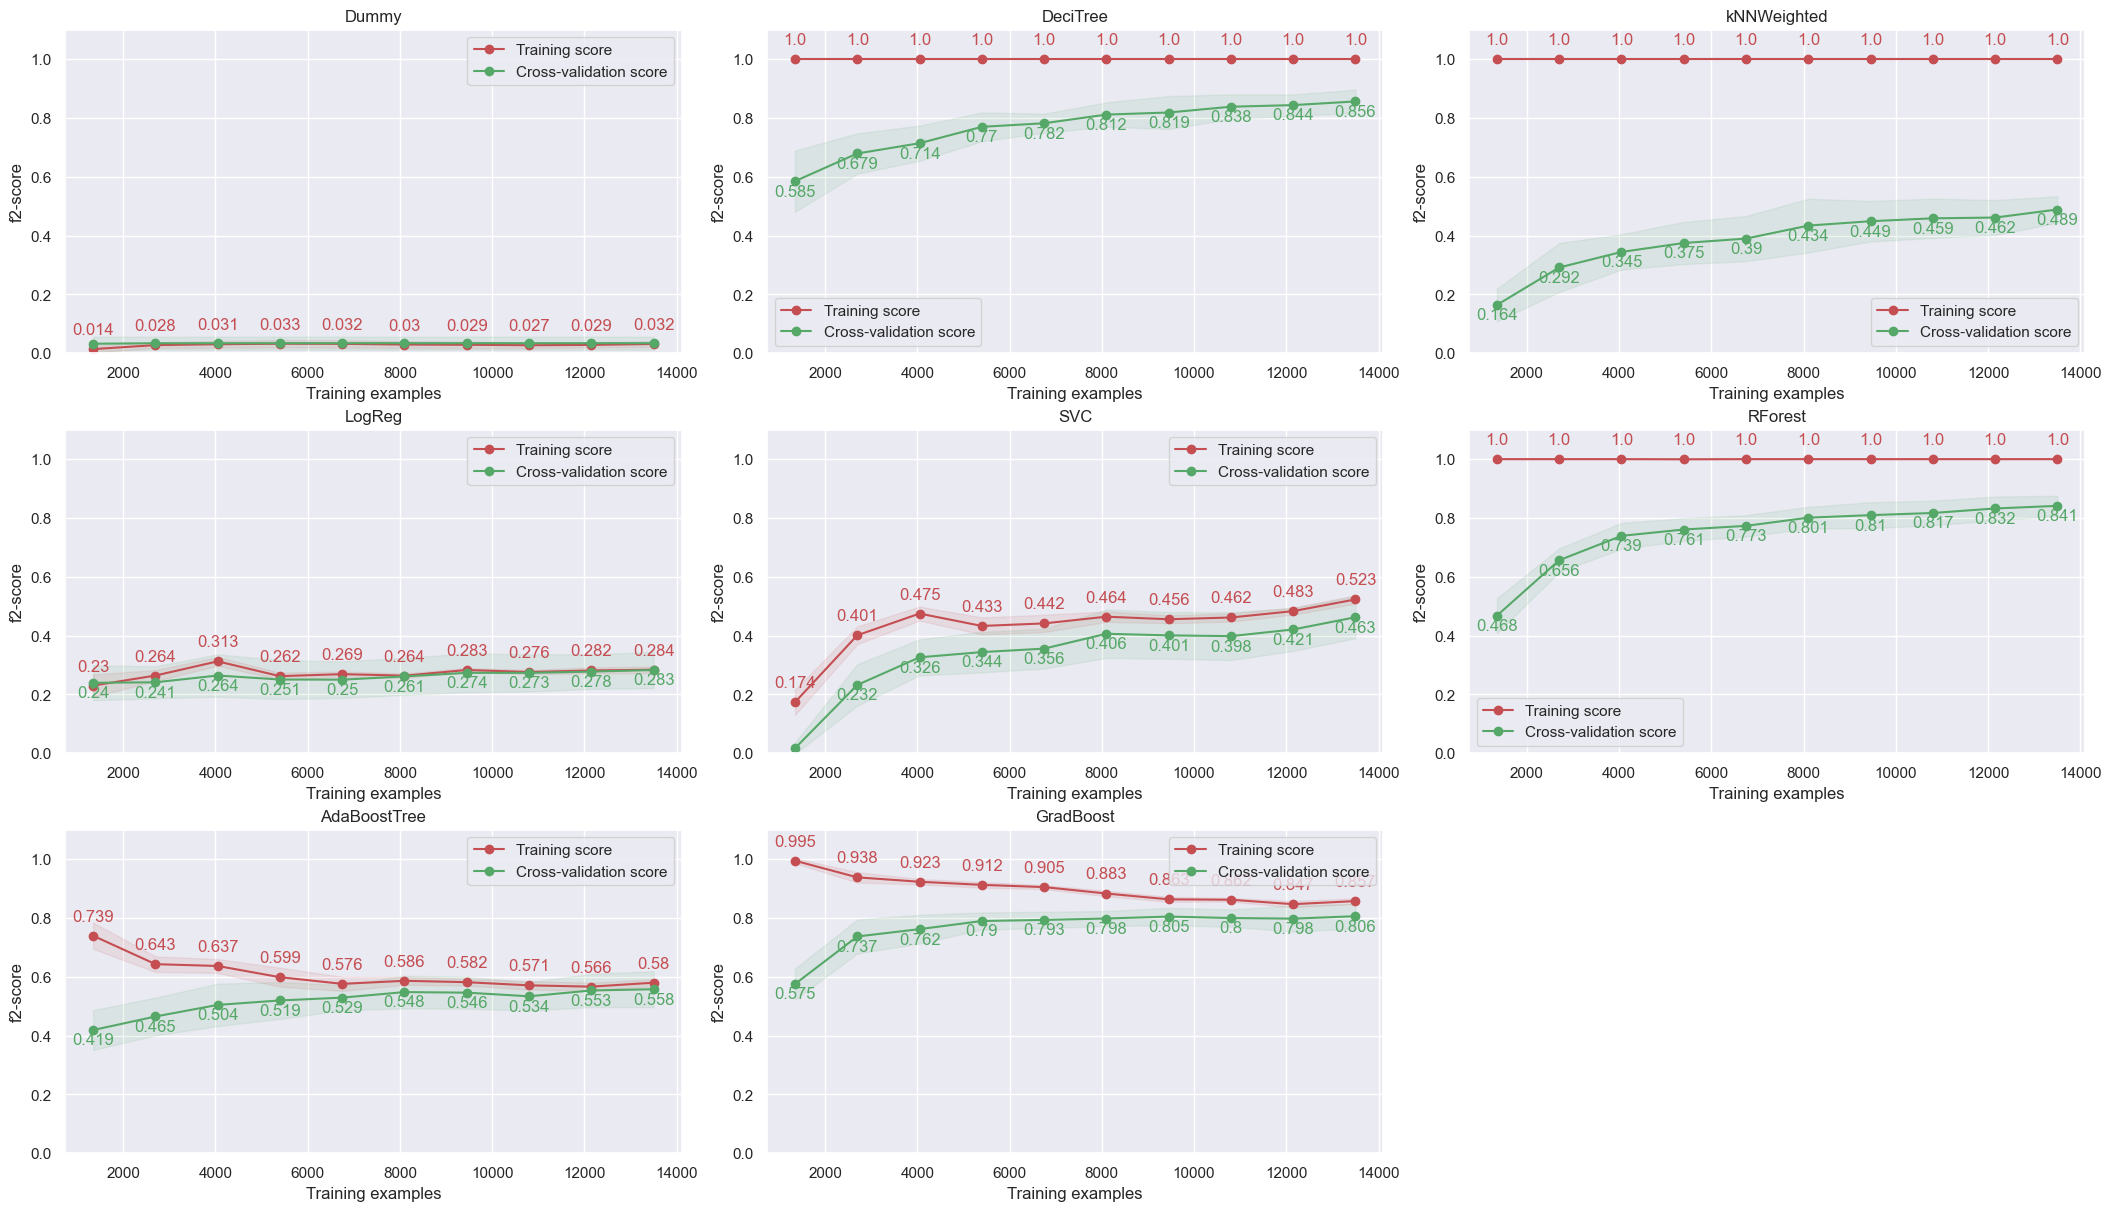

In [358]:
model_selection(
    models, {"preprocessor": preprocessor_pipe}, X_train, y_train, lc_kwargs=lc_kwargs
)

 CV Results: <br>
The models all have relatively low standard deviations for their scores. <br>
Uniform DummyClassifier performs horibly regardless of the training size. <br>
LogReg, and SVC with 'rbf' kernel are all underfitted to the data, converging to low scores. <br>
kNNWeighted, DeciTree and RForest are all overfitted with very high training scores, but DeciTree and RForest still perform well on the validation data. <br>

Dummy
f2-score: 0.12743864065449967


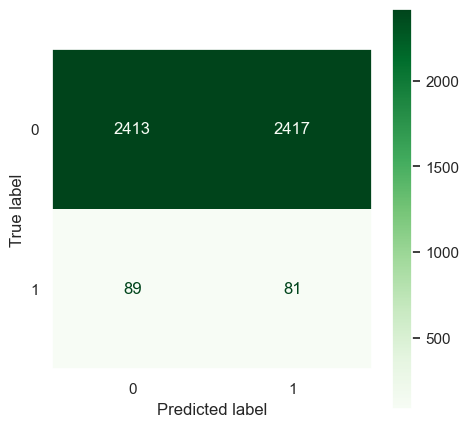

DeciTree
f2-score: 0.8525345622119815


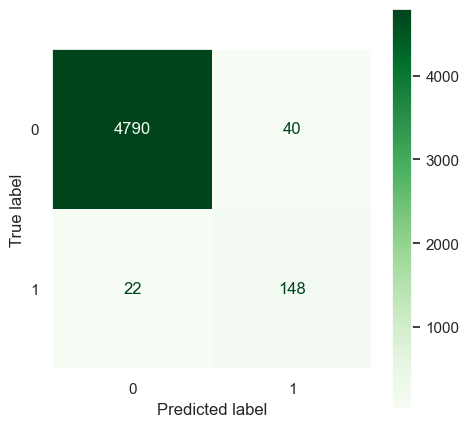

RForest
f2-score: 0.8543922984356198


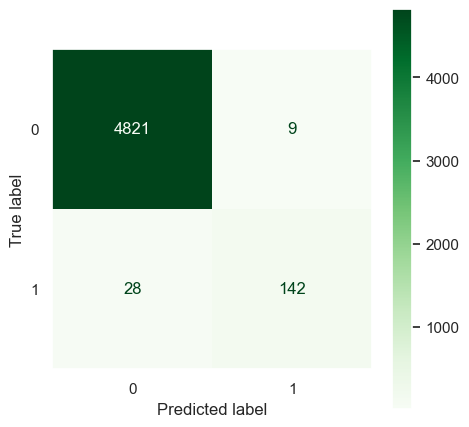

In [396]:
selected_models = {
    'Dummy': DummyClassifier(strategy='uniform', random_state=39),
    'DeciTree': DecisionTreeClassifier(random_state=39),
    'RForest': RandomForestClassifier(random_state=39),
}

fitted_models = {}
for name, model in selected_models.items():
    print(name)
    pipe = clone(preprocessor_pipe)
    pipe.steps.append((name, model))
    fitted_models[name] = pipe.fit(X_train, y_train)
    evaluate_model(pipe, X_test, y_test, 'f2-score', fbeta_scorer, cf_kwargs=cf_kwargs)


Compared to a model which randomly predicts the classes, the selected models all perform way better, with f2-scores above 0.8 compared to the baseline's 0.127

<br>
Of the best-fitted models for the data, RForest barely won with the highest f2-score of 0.8544, but it predicted more false negatives than DeciTree <br>
However, since RForest scored the best on the evalutaion metric out of the three models, it is selected as the final model for imporvement

In [360]:
feature_importance(fitted_models['RForest'][-1])

'''
feature importance of selected model
category is the least important feature to the model
quality and the collected temperatures are quite unimportant
the created features rank quite highly, though not the best
'''

Torque (Nm)                    0.203152
createfeature-Power (kW)       0.191087
Rotation Speed (rpm)           0.175723
createfeature-Temp Diff (C)    0.146692
Tool Wear (min)                0.097735
createfeature-Revolutions      0.071315
Ambient T (C)                  0.047260
Process T (C)                  0.040547
Quality                        0.014633
Product Z                      0.004032
Product S                      0.004024
Product T                      0.003801
Name: Feature Importance, dtype: float64

## Model Improvement

### Different Preprocessing

As found out earlier during EDA, not all of the features have a very strong correlation to the target. For example, Product Category has distributions that are quite similar among the target classes.  This is supported by the selected model which ranks these features as very unimportant.
Beacuse of the weak correlations to the target, these features might mislead the model by providing an unnecessary variable to consider, hence tests are conducted to see if the models can improve without these features.

In [372]:
## Feature Transformations ##
mask = ~X.columns.isin(["Product ID", "Unique ID"])
nocategory = make_union(
    createFeature(["Process T (C)", "Ambient T (C)"], "subtract", "Temp Diff (C)"),
    createFeature(["Rotation Speed (rpm)", "Torque (Nm)"], "multiply", "Power (kW)"),
    createFeature(
        ["Rotation Speed (rpm)", "Tool Wear (min)"], "multiply", "Revolutions"
    ),
    selectFeature(X.columns[mask]),
)

mask = ~X.columns.isin(["Product ID", "Unique ID", 'Process T (C)', 'Ambient T (C)'])
nocat_notemp = make_union(
    createFeature(["Process T (C)", "Ambient T (C)"], "subtract", "Temp Diff (C)"),
    createFeature(["Rotation Speed (rpm)", "Torque (Nm)"], "multiply", "Power (kW)"),
    selectFeature(X.columns[mask]),
)

mask = ~X.columns.isin(["Product ID", "Unique ID", "Quality"])
nocat_noquality = make_union(
    createFeature(["Process T (C)", "Ambient T (C)"], "subtract", "Temp Diff (C)"),
    createFeature(["Rotation Speed (rpm)", "Torque (Nm)"], "multiply", "Power (kW)"),
    selectFeature(X.columns[mask]),
)


# Encoders ##
ordinalEnc_ct = make_column_transformer(
    (OrdinalEncoder(categories=[["L", "M", "H"]]), ["Quality"]),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

In [373]:
preprocessors = {
    "nocat": make_pipeline(
        DF_Transformer(simpImp_ct),
        DF_Transformer(nocategory),
        DF_Transformer(stdScale_ct),
        DF_Transformer(ordinalEnc_ct),
    ),
    "nocat_norev": make_pipeline(
        DF_Transformer(simpImp_ct),
        DF_Transformer(nocat_notemp),
        DF_Transformer(stdScale_ct),
        DF_Transformer(ordinalEnc_ct),
    ),
    "nocat_noquality": make_pipeline(
        DF_Transformer(simpImp_ct),
        DF_Transformer(nocat_noquality),
        DF_Transformer(stdScale_ct),
    ),
}

models = {"RForest": RandomForestClassifier(random_state=39)}

nocat
Cross Validating RForest...  RForest done!


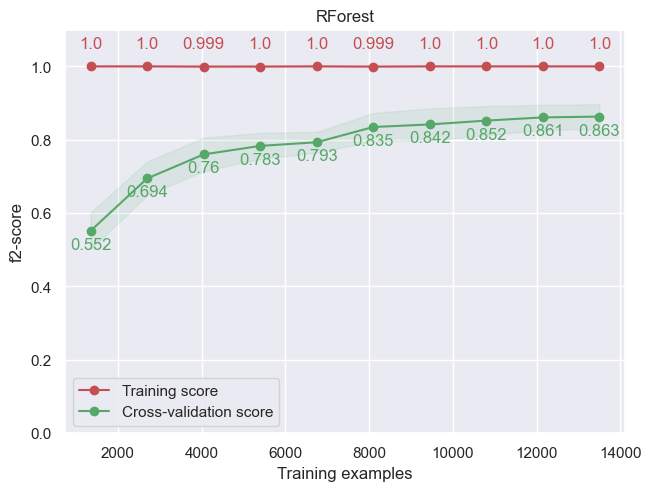

nocat_norev
Cross Validating RForest...  RForest done!


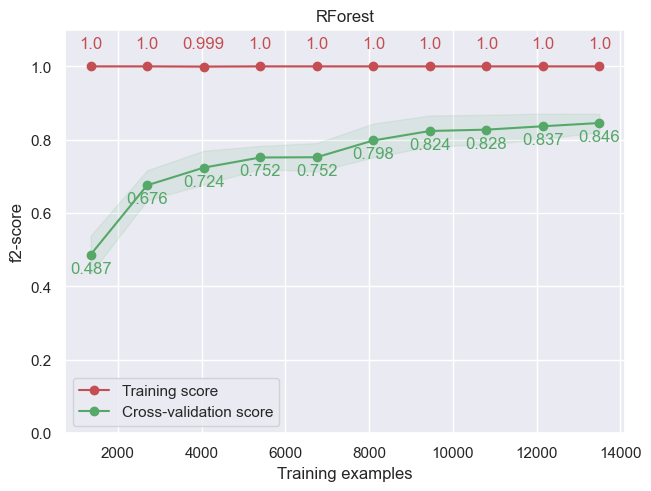

nocat_noquality
Cross Validating RForest...  RForest done!


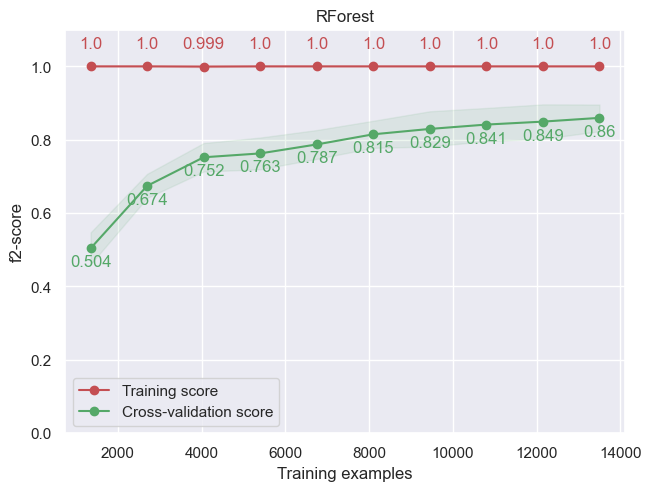

In [374]:
model_selection(
    models, preprocessors, X_train, y_train, total_cols=1, lc_kwargs=lc_kwargs
)

Excluding the product category variable resulted in a better performance than the previous model, while the other preprocsessing setups performed worse,
hence that preprocessing set is selected for hyperparameter tunig


### Random Search

In [361]:
default_params = fitted_models['RForest'][-1].get_params()
default_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 39,
 'verbose': 0,
 'warm_start': False}

In [365]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [378]:
forest = clone(preprocessors['nocat'])
forest.steps.append(("RForest", RandomForestClassifier(random_state=39)))

In [379]:
param_dist = {
    'RForest__ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 1.0, 0.0],
    'RForest__class_weight': ['balanced', 'balanced_subsample', None],
    'RForest__criterion': ('entropy', 'gini'),
    'RForest__max_depth': [1, 10, 50, 100, 500, 1000, None],
    'RForest__max_features' : ('log2', None, 'sqrt'),
    'RForest__max_leaf_nodes': [2, 10, 50, 100, 500, 1000, None],
    'RForest__max_samples': [0.1, 0.01, 0.001, 0.0001, 0.5, 1.0, 10, 50, 100, 500, 1000, None],
    'RForest__min_impurity_decrease': [0.1, 0.01, 0.001, 0.3, 0.0],
    'RForest__min_samples_leaf': [0.1, 0.01, 0.001, 2, 20, 70, 100, 1],
    'RForest__min_samples_split': [0.1, 0.01, 0.001, 2, 20, 70, 100, 2],
    'RForest__min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0.0001, 0.3, 0],
    'RForest__n_estimators': [1, 10, 50, 500, 1000, 100],
}

#param grid set up to cover a wide range, includes default settings at the end

rsearch_kwargs = {
    "cv": 10,
    "random_state": 39,
    "scoring": fbeta_scorer,
    "n_jobs": 4,
    "n_iter": 200,
}

rand_search = RandomizedSearchCV(clone(forest), param_dist, **rsearch_kwargs)





In [380]:
rand_search.fit(X_train, y_train)

rand_search.best_params_

{'RForest__n_estimators': 100,
 'RForest__min_weight_fraction_leaf': 0,
 'RForest__min_samples_split': 0.001,
 'RForest__min_samples_leaf': 2,
 'RForest__min_impurity_decrease': 0.0,
 'RForest__max_samples': 1.0,
 'RForest__max_leaf_nodes': 50,
 'RForest__max_features': None,
 'RForest__max_depth': 10,
 'RForest__criterion': 'entropy',
 'RForest__class_weight': 'balanced',
 'RForest__ccp_alpha': 0.001}

f2-score: 0.861504907306434


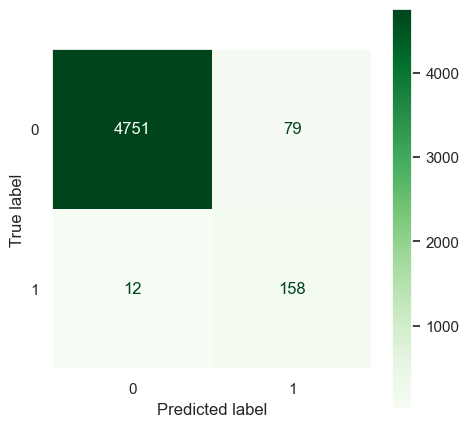

In [381]:
evaluate_model(
    rand_search.best_estimator_,
    X_test,
    y_test,
    'f2-score',
    fbeta_scorer,
    cf_kwargs=cf_kwargs,
)

Best selected set of features is worse than the default model, hence the deafult model might already contain some of the best hyperparameters

In [382]:
rsearch_results = pd.DataFrame(rand_search.cv_results_)

rsearch_results

### Grid Search

Since the RandomSearch gave us worse results, we gridsearch neear the default parameters 
<br>
Although, there are some key statistics.
1. ccp alpha of the Rsearch model and the default are at 0.001 and 0 respectively, hence they optimum might be included there the same is true for min_weight_fraction_leaf
<br>
2. min samples leaf is at 1 and 2 for the models, hence the optimum might be located around there as well
<br>

<h4>The other parameters differ too greatly between the models to narrow down the searhc space</h4>

In [389]:
param_grid = {
    'RForest__ccp_alpha': np.linspace(0, 0.001, 8),
    'RForest__min_weight_fraction_leaf' : np.linspace(0, 0.001, 4),
    'RForest__n_estimators': np.arange(100, 140, 10),
}

grid_kwargs = {
    "cv": 10,
    "scoring": fbeta_scorer,
    "n_jobs": 4,
}

grid = GridSearchCV(clone(forest), param_grid, **grid_kwargs)

In [390]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('df_transformer-1',
                                        DF_Transformer(ct=ColumnTransformer(remainder='passthrough',
                                                                            transformers=[('simpleimputer-1',
                                                                                           SimpleImputer(),
                                                                                           <sklearn.compose._column_transformer.make_column_selector object at 0x000001A981413760>),
                                                                                          ('simpleimputer-2',
                                                                                           SimpleImputer(strategy='most_frequent'),
                                                                                           <sklearn.compose._column_transf...
                                        RandomForestClassifier(random_state=39))]),
             n_jobs=4,
             param_grid={'RForest__ccp_alpha': array([0.        , 0.00014286, 0.00028571, 0.00042857, 0.00057143,
       0.00071429, 0.00085714, 0.001     ]),
                         'RForest__min_samples_leaf': array([1, 2, 3]),
                         'RForest__min_weight_fraction_leaf': array([0.        , 0.00033333, 0.00066667, 0.001     ]),
                         'RForest__n_estimators': array([100, 110, 120, 130])},
             scoring=make_scorer(fbeta_score, beta=2.0))

f2-score: 0.8911483253588516


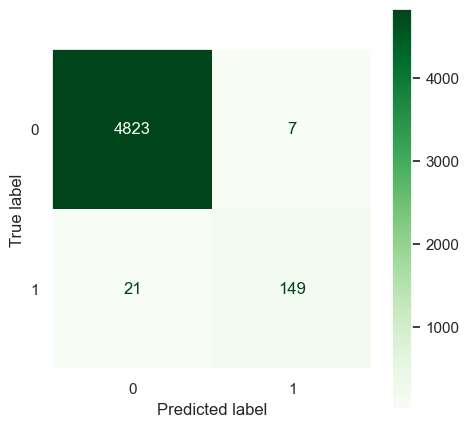

In [394]:
evaluate_model(
    grid.best_estimator_,
    X_test,
    y_test,
    'f2-score',
    fbeta_scorer,
    cf_kwargs=cf_kwargs,
)

After GridSearch, model improves its f2-score to 0.8911, missing only 21 out of 170 of failed machines
and only making 7 misclassifications of the operational machines

In [395]:
grid.best_estimator_[-1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 110,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 39,
 'verbose': 0,
 'warm_start': False}

In [397]:
feature_importance(grid.best_estimator_[-1])

"""
The top 4 features and the rest of the lower features cumulatively
contribute to about the same level of importance, around 20%
The top features all share very similar importances, meaning the model is quite well-fitted to the 
feature space of the dataset

"""

createfeature-Power (kW)       0.197846
Torque (Nm)                    0.192544
Rotation Speed (rpm)           0.177448
createfeature-Temp Diff (C)    0.157926
Tool Wear (min)                0.098303
createfeature-Revolutions      0.074063
Ambient T (C)                  0.046835
Process T (C)                  0.038852
Quality                        0.016184
Name: Feature Importance, dtype: float64

<h1>Final Score: f2-score of 89.114% with RandomForest model